In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Rain in Australia

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. 

It means -- did it rain the next day, Yes or No? 

This column is Yes if the rain for that day was 1mm or more.

# Loading the Dataset

In [3]:
!pip install opendatasets

In [4]:
import os
import opendatasets as od

In [5]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krishvadhani
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 140MB/s]

In [7]:
data_dir = './weather-dataset-rattle-package/weatherAUS.csv'

In [8]:
df = pd.read_csv(data_dir)

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Dropping all the NA values from the target Column

In [12]:
df.dropna(subset=['RainTomorrow'],inplace=True)

# splitting data into train,val,test on the basis of the year

In [ ]:
year = pd.to_datetime(df.Date).dt.year

In [ ]:
train_df = df[year<2015]
val_df = df[year==2015]
test_df = df[year>2015]

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(98988, 23)
(17231, 23)
(25974, 23)


# making list input columns and target columns

In [ ]:
input_cols=list(train_df)[1:-1]
target_cols = 'RainTomorrow'

# further splitting the train_df into inputs and targets

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

# now, we want the list of columns which are numeric and categorical

In [ ]:
numeric_cols = train_inputs.select_dtypes(np.number).columns.tolist()

In [ ]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Removing all the na values from all the numeric_cols columns

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling all the numeric columns in the range of -1 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

In [ ]:
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000
mean,0.483557,0.525583,0.006395,0.036934,0.524929,0.265223,0.108470,0.215734,0.686543,0.515015,0.612080,0.608796,0.483856,0.494156,0.506933,0.516827
std,0.149330,0.132006,0.022845,0.021552,0.200488,0.102531,0.068789,0.101451,0.188738,0.206181,0.111257,0.106567,0.254707,0.237394,0.134483,0.130703
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037723,0.525852,0.255814,0.100000,0.218391,0.690000,0.520000,0.614112,0.610531,0.493021,0.500352,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


# Dealing with Categorical Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [ ]:
enc.fit(df[categorical_cols].fillna('Unknown'))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
enc_cols = list(enc.get_feature_names(categorical_cols))
enc_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_inputs[enc_cols] = enc.transform(train_inputs[categorical_cols].fillna('Unkown'))
val_inputs[enc_cols] = enc.transform(val_inputs[categorical_cols].fillna('Unkown'))
test_inputs[enc_cols] = enc.transform(test_inputs[categorical_cols].fillna('Unkown'))

# So we are done with imputing,scaling and encoding the data now

In [ ]:
X_train = train_inputs[numeric_cols + enc_cols]

In [ ]:
X_val = val_inputs[numeric_cols + enc_cols]
X_test = test_inputs[numeric_cols + enc_cols]

# Now using DecisionTreeClassifier we classify whether it is gonna rain or not

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print(accuracy_score(train_preds,train_targets))

0.9999797955307714


In [ ]:
train_probs = model.predict_proba(X_train)

In [ ]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
print(model.score(X_val,val_targets))

0.7900295978178864


In [ ]:
val_targets.value_counts()/len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

In [ ]:
model.score(X_test,test_targets)

0.7723107723107723

In [ ]:
test_targets.value_counts()/len(test_targets)

No     0.771079
Yes    0.228921
Name: RainTomorrow, dtype: float64

# this is the case of overfitting where the model predicts high accuracy in training but low in testing

In [ ]:
from sklearn.tree import plot_tree,export_text

[Text(2232.0, 978.48, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(1116.0, 761.0400000000001, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(558.0, 543.6, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(279.0, 326.1600000000001, 'Pressure3pm <= 0.583\ngini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(139.5, 108.72000000000003, '\n  (...)  \n'),
 Text(418.5, 108.72000000000003, '\n  (...)  \n'),
 Text(837.0, 326.1600000000001, 'Humidity3pm <= 0.512\ngini = 0.153\nsamples = 56632\nvalue = [51920, 4712]'),
 Text(697.5, 108.72000000000003, '\n  (...)  \n'),
 Text(976.5, 108.72000000000003, '\n  (...)  \n'),
 Text(1674.0, 543.6, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(1395.0, 326.1600000000001, 'WindGustSpeed <= 0.318\ngini = 0.293\nsamples = 4299\nvalue = [3531, 768]'),
 Text(1255.5, 108.72000000000003, '\n  (...)  \n'),
 Text

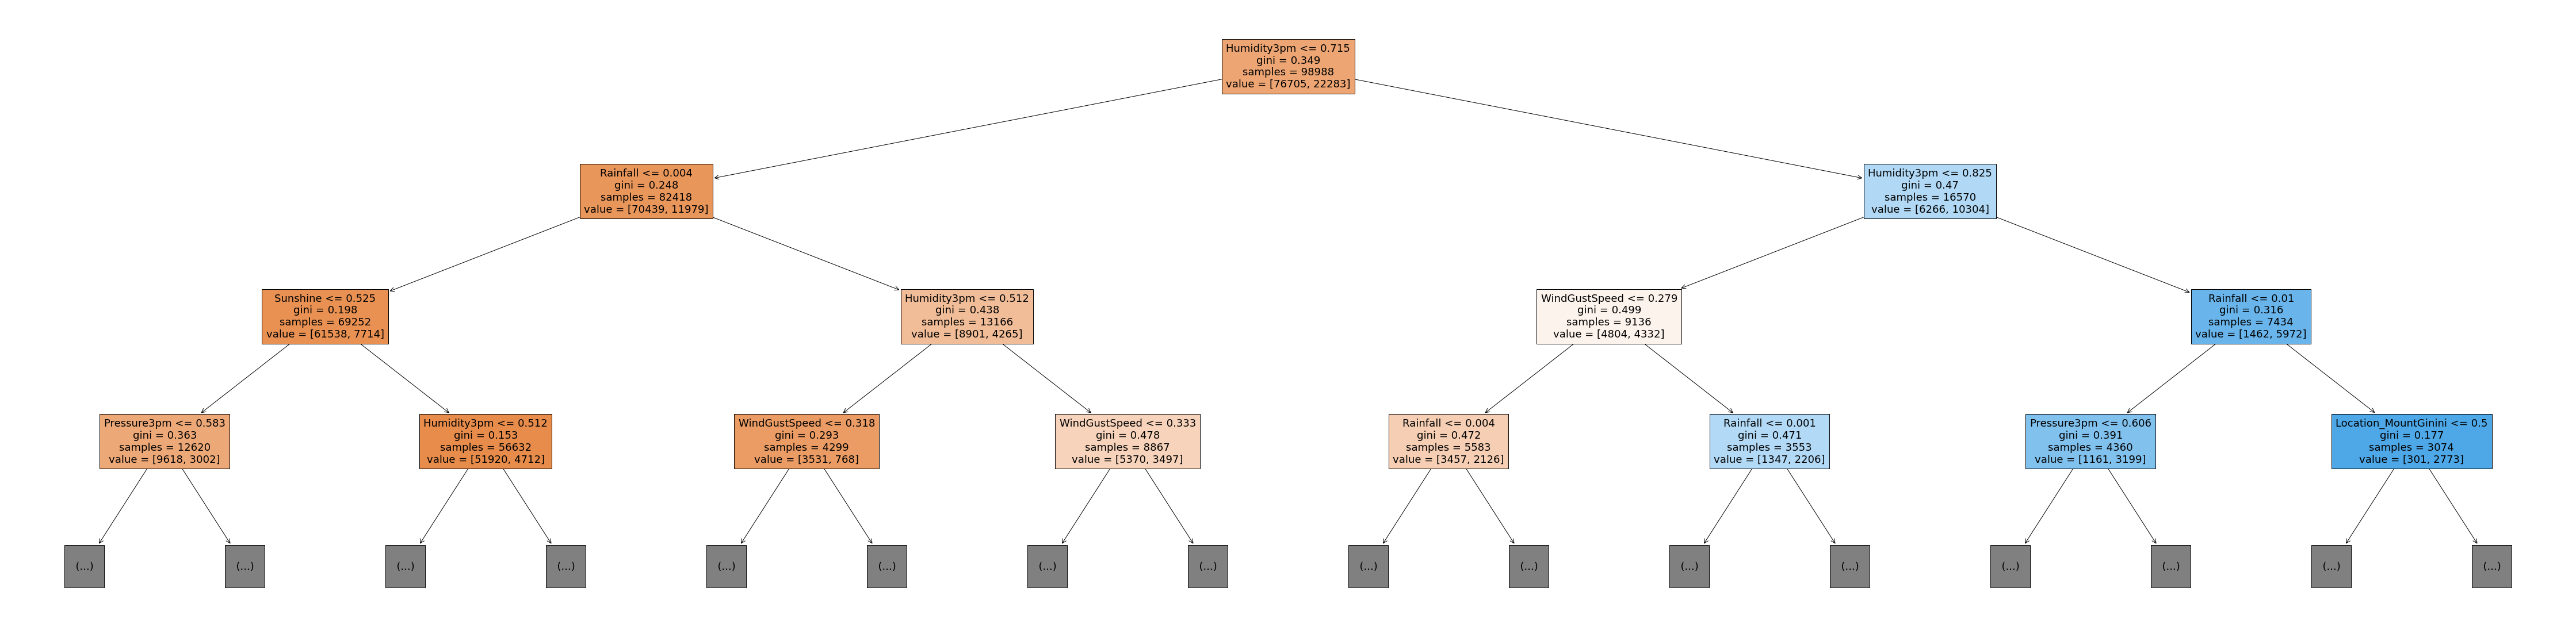

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=3,filled=True)

In [ ]:
model.tree_.max_depth

48

In [ ]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [ ]:
model.feature_importances_

array([3.68623556e-02, 3.16160573e-02, 5.89781431e-02, 2.40560328e-02,
       4.98975709e-02, 5.43615984e-02, 2.86460501e-02, 3.08051524e-02,
       3.84489859e-02, 2.62375566e-01, 3.39263116e-02, 6.13390763e-02,
       1.37425784e-02, 1.88331559e-02, 3.40432448e-02, 3.07652112e-02,
       2.26162785e-03, 2.30974874e-03, 1.28881225e-03, 5.27014333e-04,
       1.38856844e-03, 1.24587647e-03, 7.50160970e-04, 1.69206227e-03,
       9.95929972e-04, 1.50569839e-03, 7.72326130e-04, 2.43182980e-03,
       1.66301084e-03, 1.43325484e-04, 9.88699042e-04, 1.39661414e-03,
       3.81128848e-04, 9.20860929e-04, 1.72373107e-03, 1.22120978e-03,
       9.77054924e-04, 1.06530800e-03, 1.73755486e-03, 2.12059730e-03,
       6.88044605e-04, 5.27179019e-04, 1.47707251e-03, 1.48345353e-03,
       1.33475879e-03, 1.12659472e-03, 8.39189853e-04, 1.68068282e-03,
       9.16224981e-04, 2.30397749e-03, 7.03838339e-04, 1.87127305e-03,
       1.04277470e-03, 1.23216157e-03, 1.20330193e-03, 4.33250337e-04,
      

In [ ]:
imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
imp_df.head()

,feature,importance
9,Humidity3pm,0.262376
11,Pressure3pm,0.061339
2,Rainfall,0.058978
5,WindGustSpeed,0.054362
4,Sunshine,0.049898


In [ ]:
import plotly.express as px

In [ ]:
px.bar(imp_df.head(10),x='importance',y='feature')

In [ ]:
model.tree_.max_depth

48

In [ ]:
model = DecisionTreeClassifier(max_depth=3,random_state=42)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(X_train,train_targets)

0.8291308037337859

In [ ]:
model.score(X_val, val_targets)

0.8334397307178921

[Text(2232.0, 951.3000000000001, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(1116.0, 679.5, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(558.0, 407.70000000000005, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(279.0, 135.89999999999998, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(837.0, 135.89999999999998, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(1674.0, 407.70000000000005, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(1395.0, 135.89999999999998, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(1953.0, 135.89999999999998, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(3348.0, 679.5, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Tex

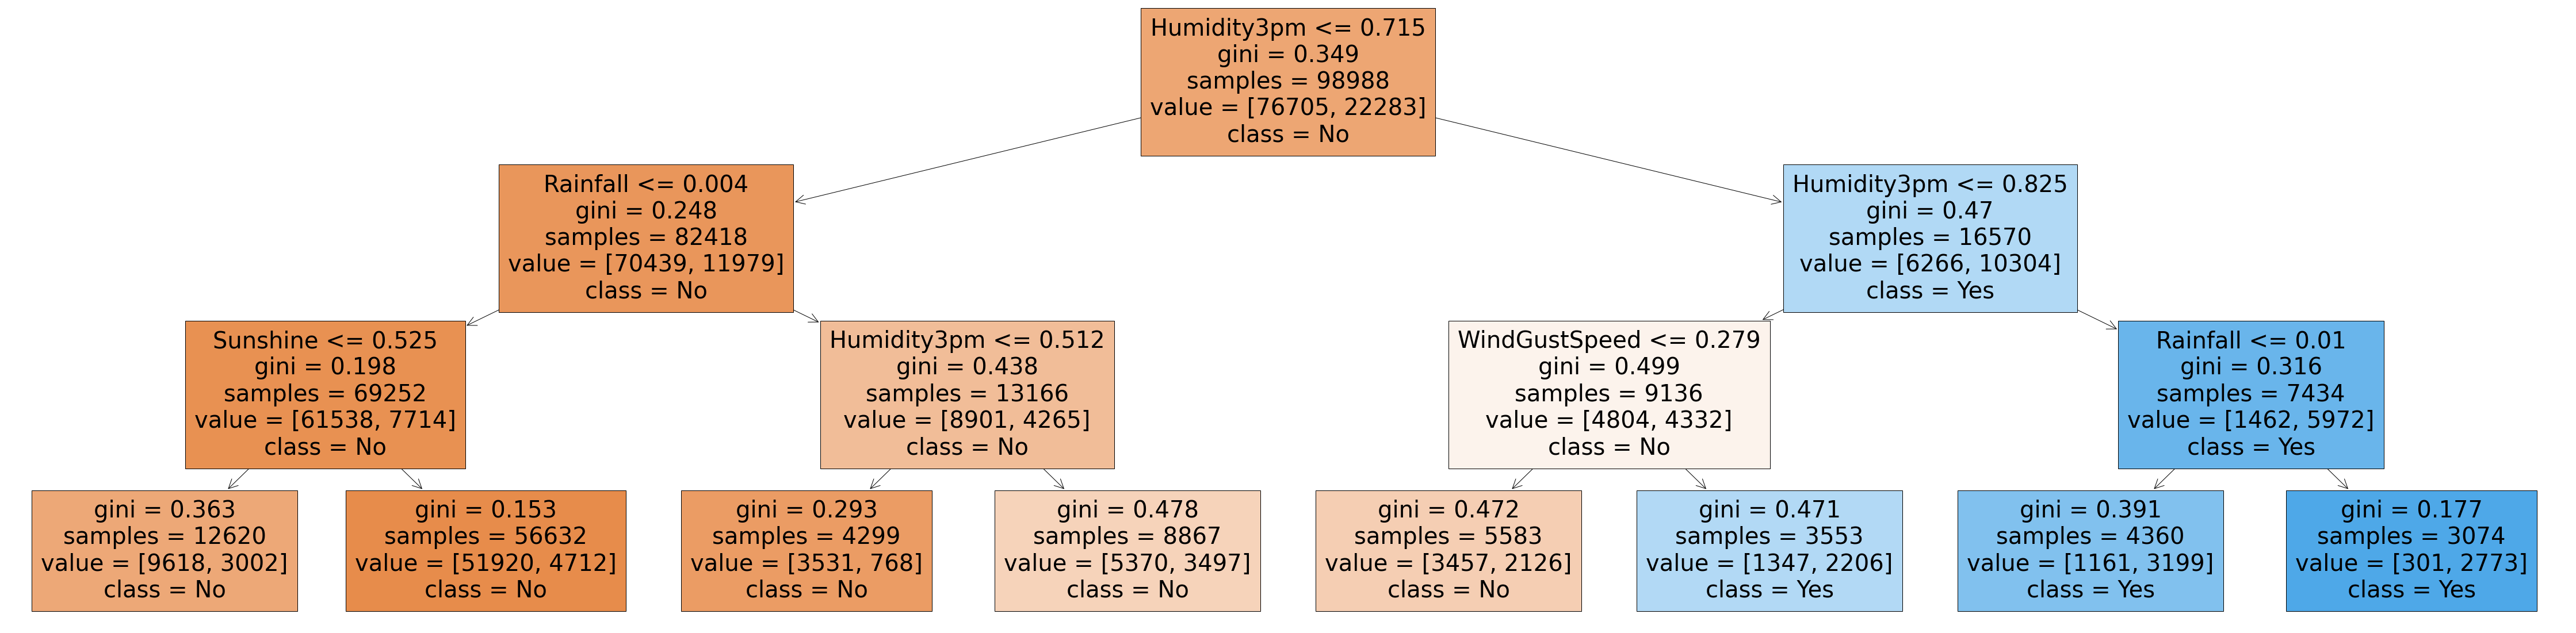

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,filled=True,class_names=model.classes_)

In [ ]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,train_targets)
    train_error = 1 - model.score(X_train,train_targets)
    val_error = 1 - model.score(X_val,val_targets)
    return {'Max Depth':md, 'Training Error': train_error, 'Validation Error': val_error}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,48)])

In [ ]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147644,0.157797
8,9,0.140734,0.156346
9,10,0.132774,0.157739


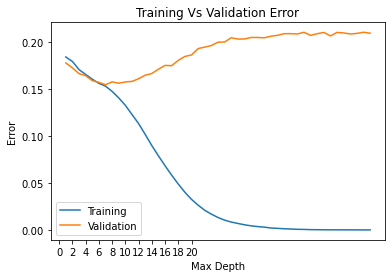

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'],errors_df['Training Error'])
plt.plot(errors_df['Max Depth'],errors_df['Validation Error'])
plt.title('Training Vs Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.xticks(range(0,21,2))
plt.legend(['Training','Validation'])

# looking at the graph we can see at max depth 7 we have best case

In [ ]:
model = DecisionTreeClassifier(max_depth=8,random_state=42)
model.fit(X_train,train_targets)
model.score(X_train,train_targets) * 100, model.score(X_val,val_targets) * 100

(85.2355841112054, 84.22030062097383)

# another way to control the complexity is max leaf nodes

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=80,random_state=42)
model.fit(X_train,train_targets)
model.score(X_train,train_targets)

0.8445872226936598

In [ ]:
model.score(X_val,val_targets)

0.8428413905170913

In [ ]:
model.tree_.max_depth

10

In [ ]:
def max_node_error(mld):
    model = DecisionTreeClassifier(max_leaf_nodes=mld,random_state=42)
    model.fit(X_train,train_targets)
    training_error = model.score(X_train,train_targets)
    val_error = model.score(X_val,val_targets)
    return {'Max Nodes': mld, 'Training Error': training_error, 'Validation Error': val_error}

In [ ]:
errors_df_node = pd.DataFrame([max_node_error(mld) for mld in range(100,150)])

In [14]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/krish-vadhani/decision-tree-classifier


'https://jovian.ai/krish-vadhani/decision-tree-classifier'